<div align="center">

#  

# Demystifying AI - Session 1
## The Math and Ideas of Neurons

### Pate Motter, PhD

AI Performance Engineer @ Google

</div>


## About This Notebook

Welcome! In this session, we’re going to explore the basic buildings blocks of neural networks.

This notebook will cover:

- What a neuron in a neural network is and how it works
- The math behind a neuron
- A look at common functions (called activation functions) that help the network make decisions

We intentionally leave out the topic of backpropagation for this session, but it will be the main topic of Session 2.

Feel free to run the code, play around with the numbers, and read through the explanations as slowly as you need to. We’re here to demystify these ideas together!

## 1. What is a Neural Network?

Imagine a neural network as a team of very simple calculators that work together to solve problems. Each calculator (or **neuron**) takes in some numbers, does a small calculation, and passes its result on. When you connect many of these neurons, they can learn to recognize patterns—like spotting a cat in a photo or understanding a sentence.

## 2. Breaking Down a Neuron

* Activation Function: A function applied to the weighted sum of inputs in a neuron,
introducing non-linearity and determining the neuron's output.  Examples include sigmoid, ReLU, and tanh.

* Bias ($b$): A constant value added to the weighted sum of inputs in a neuron. It allows the neuron to activate even when all inputs are zero.

* Input ($x_i$): A value received by a neuron, representing a piece of information.

* Weight ($w_i$): A value associated with each input to a neuron, determining its importance.  Higher weights indicate greater importance.

* Weighted Sum: The sum of each input multiplied by its corresponding weight, plus the bias. This is the input to the activation function.





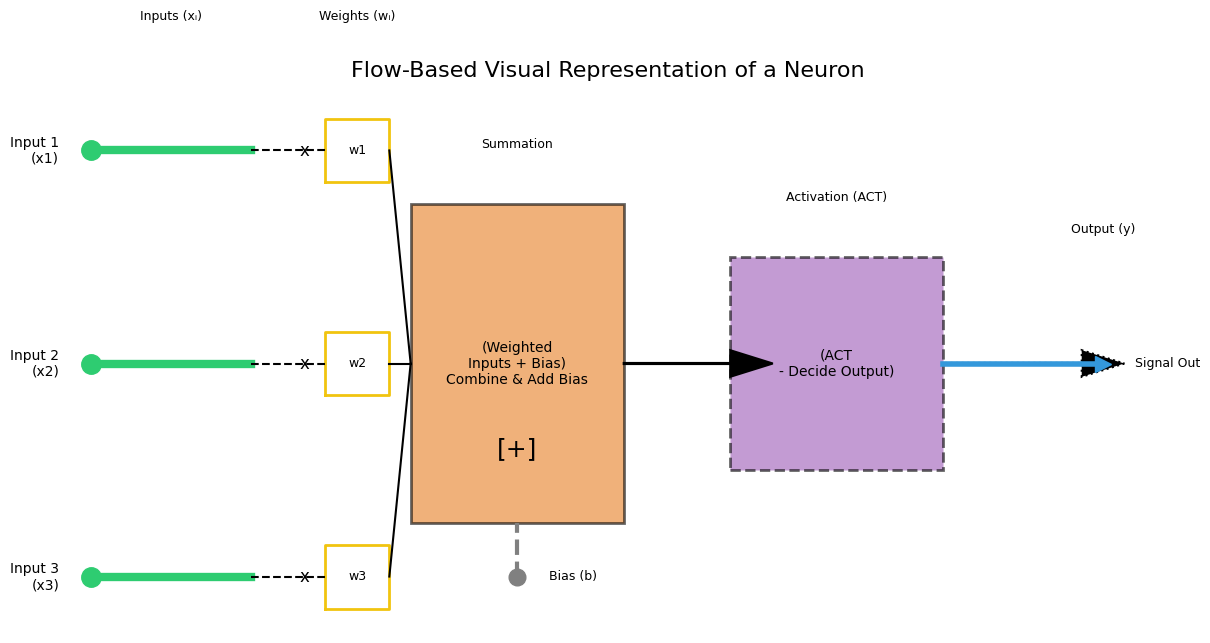

In [ ]:
# @title Neuron Visualization
import matplotlib.pyplot as plt
import numpy as np

def visualize_neuron_operations():
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.set_aspect('equal')
    ax.axis('off')

    # --- Colors --- (Keep colors consistent)
    input_color = '#2ecc71'
    weight_color = '#f1c40f'
    summation_color = '#e67e22'
    activation_color = '#9b59b6'
    output_color = '#3498db'
    text_color = 'black'
    white_box_facecolor = 'white'
    white_box_alpha = 0.8
    box_edge_color = 'lightgray'
    connection_line_color = 'black'


    # --- Input Channels (Dendrites) - LARGER ---
    input_start_x = 0.1
    input_y_positions = [0.7, 0.5, 0.3]
    num_inputs = len(input_y_positions)

    # Category Label - Inputs
    input_label_y_pos = input_y_positions[0] + 0.12
    plt.text(input_start_x + 0.075, input_label_y_pos, "Inputs (xᵢ)", fontsize=9, ha='center', va='bottom')


    for i in range(num_inputs):
        input_channel_y = input_y_positions[i]
        plt.plot([input_start_x, input_start_x + 0.15], [input_channel_y, input_channel_y], color=input_color, linewidth=6)
        plt.plot(input_start_x, input_channel_y, 'o', color=input_color, markersize=14)
        plt.text(input_start_x - 0.03, input_channel_y, f'Input {i+1}\n(x{i+1})', color=text_color, fontsize=10, ha='right', va='center')


    # --- Weights as "Dials" - LARGER, with Multiplication Symbol ---
    weight_x = input_start_x + 0.25
    # Category Label - Weights
    weight_label_y_pos = input_y_positions[0] + 0.12
    plt.text(weight_x, weight_label_y_pos, "Weights (wᵢ)", fontsize=9, ha='center', va='bottom')

    for i in range(num_inputs):
        weight_y = input_y_positions[i]
        plt.plot([weight_x - 0.03, weight_x + 0.03, weight_x + 0.03, weight_x - 0.03, weight_x - 0.03], # Larger weight squares
                 [weight_y - 0.03, weight_y - 0.03, weight_y + 0.03, weight_y + 0.03, weight_y - 0.03],
                 color=weight_color, linewidth=2)
        plt.text(weight_x, weight_y, f'w{i+1}', color=text_color, fontsize=9, ha='center', va='center') # Slightly larger weight labels
        plt.plot([input_start_x + 0.15, weight_x - 0.03], [input_y_positions[i], weight_y], '--', color=connection_line_color, linewidth=1.5) # Slightly thicker connection lines

        # Multiplication Symbol - "x" between Input and Weight
        mult_x = input_start_x + 0.20 # Position for multiplication symbol
        plt.text(mult_x, weight_y, 'x', color=text_color, fontsize=12, ha='center', va='center')


    # --- Summation "Mixer" Box with Summation Symbol (REPLACED) ---
    summation_box_x = 0.5
    summation_box_y = 0.5
    summation_box_width = 0.2
    summation_box_height = 0.3
    # Category Label - Summation
    summation_box_label_y_pos = summation_box_y + summation_box_height/2 + 0.05
    plt.text(summation_box_x, summation_box_label_y_pos, "Summation", fontsize=9, ha='center', va='bottom') # Just "Summation" label now

    summation_box = plt.Rectangle((summation_box_x - summation_box_width/2, summation_box_y - summation_box_height/2),
                                  summation_box_width, summation_box_height,
                                  facecolor=summation_color, alpha=0.6, edgecolor=text_color, linewidth=2)
    ax.add_patch(summation_box)
    plt.text(summation_box_x, summation_box_y, '(Weighted\nInputs + Bias)\nCombine & Add Bias', color=text_color, fontsize=10, ha='center', va='center') # More descriptive text

    # Summation Symbol - Replaced with simple [+] symbol
    plt.text(summation_box_x, summation_box_y - 0.08, '[+]', color=text_color, fontsize=18, ha='center', va='center') # Simple [+] for summation


    # Connections from Weights to Summation
    for i in range(num_inputs):
        plt.plot([weight_x + 0.03, summation_box_x - summation_box_width/2], [input_y_positions[i], summation_box_y], '-', color=connection_line_color, linewidth=1.5) # Slightly thicker lines

    # Bias Input to Summation - MORE PRONOUNCED
    bias_x = summation_box_x
    bias_y = summation_box_y - summation_box_height/2 - 0.1
    plt.plot([bias_x, bias_x], [bias_y + 0.05, summation_box_y - summation_box_height/2], '--', color='gray', linewidth=3) # Thicker bias line
    plt.plot(bias_x, bias_y + 0.05, 'o', color='gray', markersize=12)
    plt.text(bias_x + 0.03, bias_y + 0.05, 'Bias (b)', color=text_color, fontsize=9, ha='left', va='center')


    # --- Activation Function as "Threshold Gate" ---
    activation_box_x = summation_box_x + summation_box_width/2 + 0.2
    activation_box_y = summation_box_y
    activation_box_width = 0.2
    activation_box_height = 0.2
    # Category Label - Activation
    activation_box_label_y_pos = activation_box_y + activation_box_height/2 + 0.05
    plt.text(activation_box_x, activation_box_label_y_pos, "Activation (ACT)", fontsize=9, ha='center', va='bottom')

    activation_box = plt.Rectangle((activation_box_x - activation_box_width/2, activation_box_y - activation_box_height/2),
                                  activation_box_width, activation_box_height,
                                  facecolor=activation_color, alpha=0.6, edgecolor=text_color, linewidth=2, linestyle='--')
    ax.add_patch(activation_box)
    plt.text(activation_box_x, activation_box_y, '(ACT\n- Decide Output)', color=text_color, fontsize=10, ha='center', va='center') # More descriptive text


    # Connection from Summation to Activation
    plt.arrow(summation_box_x + summation_box_width/2, summation_box_y, activation_box_x - (summation_box_x + summation_box_width/2) - activation_box_width/2 , 0,
              head_width=0.025, head_length=0.04, fc=connection_line_color, ec=connection_line_color, linewidth=1.5) # Slightly larger arrow


    # --- Output "Signal Emanating" ---
    output_start_x = activation_box_x + activation_box_width/2 + 0.15
    output_y = summation_box_y
    output_line_length = 0.2
    # Category Label - Output
    output_label_y_pos = output_y + 0.12
    plt.text(output_start_x, output_label_y_pos, "Output (y)", fontsize=9, ha='center', va='bottom')

    plt.plot([activation_box_x + activation_box_width/2, output_start_x], [output_y, output_y], color=output_color, linewidth=4) # Thicker output line
    plt.plot(output_start_x, output_y, '>', color=output_color, markersize=12)
    plt.text(output_start_x + 0.03, output_y, 'Signal Out', color=text_color, fontsize=9, ha='left', va='center') # Added "Signal Out" label


    # Connection from Activation to Output
    plt.arrow(activation_box_x + activation_box_width/2, activation_box_y, output_start_x - (activation_box_x + activation_box_width/2) - 0.02, 0,
              head_width=0.025, head_length=0.04, fc=connection_line_color, ec=connection_line_color, linestyle='dotted', linewidth=1.5) # Slightly larger arrow


    # --- Title ---
    title_y_pos = 0.98
    plt.title('Flow-Based Visual Representation of a Neuron', fontsize=16, pad=20, y=title_y_pos) # Updated title


    plt.show()

visualize_neuron_operations()

## 3. Understanding the Math

Let’s break down the math step-by-step using simple language:

1. **Weighted Sum:** First, the neuron multiplies each input by its corresponding weight and adds all these products together with the bias:

  **Computing the Weighted Sum**\
  $$ weighted\_sum = bias + (weight_0 * input_0)\ +\ ...\ + (weight_n * input_n)$$

  $$ weighted\_sum = b + \sum_{i=0}^{n} w_ii_i $$


   * Think of this like making a smoothie—you add different ingredients (inputs) in varying amounts (weights) and then top it off with a pinch of something extra (bias).

2. **Activation:** Next, this result \(z\) is passed through an activation function. For example, if we use the sigmoid function, it looks like this:


   $$ output = \frac{1}{1+e^{-z}} $$

   This function squashes the result into a number between 0 and 1, much like turning the raw smoothie ingredients into a drink with a consistent taste.

The overall process is:
$$output = activation(weighted_sum) $$
$$ output = activation((weight_0 * input_0)\ +\ ...\ + (weight_n * input_n))$$
$$output = activation(b + \sum_{i=0}^{n} w_ii_i) $$

Each step is simple—multiply, add, and then adjust the result with a function. Later, we will see how these basic steps build into a full network.

In [ ]:
# @title Neuron Code

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, HTML

def neuron_visualization(x_input, weight, bias):
    # Compute the neuron's weighted sum (z) and activation output (a)
    z = weight * x_input + bias
    a = 1 / (1 + np.exp(-z))  # Sigmoid activation function

    # --- Calculate activations for individual components ---
    z_no_bias = weight * x_input
    a_no_bias = 1 / (1 + np.exp(-z_no_bias)) # Activation without bias

    z_only_bias = bias
    a_only_bias = 1 / (1 + np.exp(-z_only_bias)) # Activation with only bias


    # Create a figure with two subplots: one for the weighted sum and one for the activation function.
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    # --- Left Plot: Weighted Sum Calculation (Stacked Bar) ---
    # Calculate the contributions - More descriptive variable names
    contribution_input = weight * x_input
    contribution_bias = bias
    contributions = [contribution_input, contribution_bias] # More descriptive variable name
    contribution_labels = ['Input Contribution (x*w)', 'Bias Contribution (b)'] # More descriptive labels
    colors = ['skyblue', 'orange']

    # Create stacked bar chart
    bar_width = 0.5 # Adjust width of the bars if needed
    bar_positions = [0] # Only one bar position since it's a single stacked bar

    # Plot the 'Input Contribution' as the base of the stack
    bar1 = ax[0].bar(bar_positions, [contribution_input], bar_width, label=contribution_labels[0], color=colors[0])
    # Plot the 'Bias Contribution' on top of the 'Input Contribution'
    bar2 = ax[0].bar(bar_positions, [contribution_bias], bar_width, bottom=[contribution_input], label=contribution_labels[1], color=colors[1])


    ax[0].set_xticks(bar_positions) # Set x ticks to be at the bar positions
    ax[0].set_xticklabels(['Total Weighted Sum (z)']) # Label for the x-axis tick

    ax[0].set_title("Step 1: Compute Weighted Sum (z)")
    ax[0].set_ylabel("Value") # y-axis label now meaningful for vertical bars representing values
    ax[0].grid(True, linestyle='--', alpha=0.7, axis='y') # Grid on y-axis for vertical bars

    # Display total z value above the stacked bar - Now with formula breakdown
    z_annotation_text = f"z = (x*w) + b = ({x_input:.2f} * {weight:.2f}) + {bias:.2f} = {z:.2f}"
    ax[0].text(bar_positions[0], z, z_annotation_text, ha='center', va='bottom') # Annotation for total z

    # --- Move Legend ---
    ax[0].legend(loc='lower left') # Adjusted legend location to lower left


    # --- Right Plot: Activation Function (No changes here) ---
    # Plot the sigmoid activation function curve
    x_vals = np.linspace(-10, 10, 400)
    sigmoid_vals = 1 / (1 + np.exp(-x_vals))
    ax[1].plot(x_vals, sigmoid_vals, label='Sigmoid Function', color='purple')

    # Mark the neuron's output on the sigmoid curve
    ax[1].scatter(z, a, color='red', s=100, zorder=5, label=f"Activation (with bias) a = {a:.2f}")
    ax[1].scatter(z_no_bias, a_no_bias, color='blue', s=80, zorder=4, label=f"Activation (no bias) = {a_no_bias:.2f}")
    ax[1].scatter(z_only_bias, a_only_bias, color='green', s=80, zorder=3, label=f"Activation (only bias) = {a_only_bias:.2f}")

    ax[1].set_title("Step 2: Apply Sigmoid Activation")
    ax[1].set_xlabel("Weighted Sum (z)")
    ax[1].set_ylabel("Activation (a)")
    ax[1].grid(True, linestyle='--', alpha=0.6)
    ax[1].legend()

    plt.tight_layout()
    plt.show()

    # --- Detailed Explanation (Moved back to bottom) ---
    explanation_text = f"""
    <h3>Neuron Calculation Explanation:</h3>
    <ol>
      <li>
        <b>Weighted Sum Calculation:</b><br>
        The neuron calculates a weighted sum as follows:<br>
        <em>z = (x × w) + b</em><br>
        With the current values:
        <ul>
          <li>x (Input) = <b>{x_input}</b></li>
          <li>w (Weight) = <b>{weight}</b></li>
          <li>b (Bias) = <b>{bias}</b></li>
        </ul>
        This gives: <em>z = ({x_input} × {weight}) + {bias} = {z:.2f}</em>
        <p><b>Visualization:</b> The stacked bar chart to the left visually represents this sum.<br>
        The total height of the bar is 'z', composed of the 'Input Contribution' (bottom segment)<br>
        and the 'Bias Contribution' (top segment).<br>
        </p>
      </li>
      <li>
        <b>Sigmoid Activation with Components Visualized:</b><br>
        The sigmoid function is applied to different values to show the impact of input and bias:<br>
        <ul>
          <li><b>Activation (with bias):</b>  This (red point) shows the activation <em>a</em> calculated using the full weighted sum <em>z = (x × w) + b</em>.  <em>a ≈ {a:.2f}</em></li>
          <li><b>Activation (no bias):</b> This (blue point) shows the activation if only the weighted input was considered (<em>z = x × w</em>). <em>Activation ≈ {a_no_bias:.2f}</em></li>
          <li><b>Activation (only bias):</b> This (green point) shows the activation if only the bias was considered (<em>z = b</em>). <em>Activation ≈ {a_only_bias:.2f}</em></li>
        </ul>
      </li>
    </ol>
    <p>Adjust the sliders to see how changes in the input, weight, or bias affect both the weighted sum and these different activation outputs.</p>
    """
    display(HTML(explanation_text)) # Display explanation at the bottom


# Create interactive sliders for input, weight, and bias
interact(
    neuron_visualization,
    x_input=widgets.FloatSlider(value=1.0, min=-10.0, max=10.0, step=0.1, description='Input (x)'),
    weight=widgets.FloatSlider(value=1.0, min=-5.0, max=5.0, step=0.1, description='Weight (w)'),
    bias=widgets.FloatSlider(value=1.0, min=-5.0, max=5.0, step=0.1, description='Bias (b)')
);

interactive(children=(FloatSlider(value=1.0, description='Input (x)', max=10.0, min=-10.0), FloatSlider(value=…

---
## 4. Activation Functions:  Why Neurons Need Them

Activation functions are essential neuron components because:

### 1.  Enable Controlled Neuron Output:

Imagine neurons need to *modulate* their message, not just simply send it or not. The **activation function controls the strength and nature of a neuron's output signal based on its input.**  It's not about purely "selective firing" (on/off), but about enabling a *graded* response.  Without activation functions, neurons would just linearly pass on input sums, lacking the ability to fine-tune and control their output signals.

### 2.  Introduce Non-Linearity for Rich Representations:

If neurons only performed linear sums of inputs, neural networks would be limited to learning simple linear relationships. **Activation functions introduce non-linearity, enabling neurons to model complex, curved patterns in data.** This transformation is key for neural networks to represent and learn intricate features beyond simple straight-line combinations.

### 3.  Transform Signals for Meaningful Features:

Neurons shouldn't just passively relay raw input. **Activation functions actively transform input signals, shaping and refining them to represent meaningful features.** This transformation allows neurons to act as feature detectors, filtering noise and emphasizing relevant information.  Without this, neurons would simply propagate unprocessed signals, hindering effective learning.

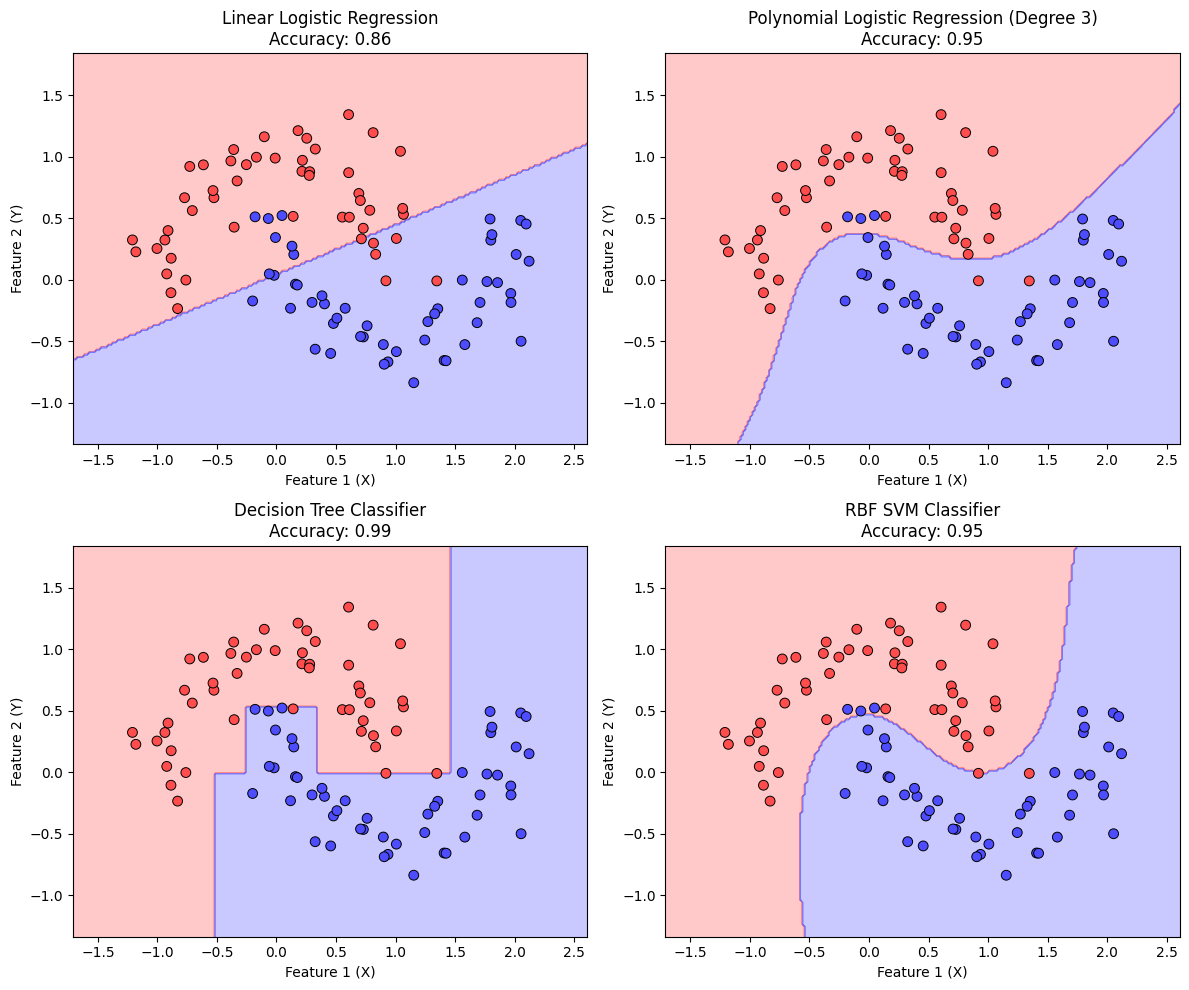

Linear Logistic Regression Accuracy: 0.8600
Polynomial Logistic Regression (Degree 3) Accuracy: 0.9500
Decision Tree Classifier Accuracy: 0.9900
RBF SVM Classifier Accuracy: 0.9500


In [ ]:
# @title Non-linearity code
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# 1. Generate Non-Linearly Separable Data (Moons dataset)
X, y = make_moons(n_samples=100, noise=0.2, random_state=0)

# 2. Linear Logistic Regression Classifier
linear_logreg = LogisticRegression()
linear_logreg.fit(X, y)
y_linear_pred = linear_logreg.predict(X)

# 3. Polynomial Logistic Regression Classifier (Degree 3)
poly_degree = 3
poly_logreg_degree3 = make_pipeline(PolynomialFeatures(poly_degree), LogisticRegression())
poly_logreg_degree3.fit(X, y)
y_poly_pred_degree3 = poly_logreg_degree3.predict(X)

# 4. Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=0) # Limit depth for visualization
tree_clf.fit(X, y)
y_tree_pred = tree_clf.predict(X)

# 5. RBF SVM Classifier
rbf_svm_clf = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=0) # gamma='scale' is default, C=1.0 is regularization
rbf_svm_clf.fit(X, y)
y_rbf_svm_pred = rbf_svm_clf.predict(X)


# Modified function to plot decision boundaries with brighter colors (no changes needed here)
def plot_decision_boundary_brighter_colors(clf, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Define brighter colormap
    bright_cmap = ListedColormap(['#FF4D4D', '#4D4DFF']) # Bright Red, Bright Blue

    plt.contourf(xx, yy, Z, cmap=bright_cmap, alpha=0.3) # Use brighter colormap for regions, keep transparency

    # Plotting data points with larger size, black outlines, and brighter colors
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=bright_cmap, s=50, edgecolors='k', linewidth=0.7) # Use brighter colormap for points

    plt.title(title)
    plt.xlabel('Feature 1 (X)')
    plt.ylabel('Feature 2 (Y)')


# Plotting with Four Classifiers in 2x2 Grid
plt.figure(figsize=(12, 10)) # Adjusted figure size for 2x2 grid

plt.subplot(2, 2, 1) # 2 rows, 2 columns, first subplot (top left)
plot_decision_boundary_brighter_colors(linear_logreg, X, y, 'Linear Logistic Regression')
plt.title(f'Linear Logistic Regression\nAccuracy: {accuracy_score(y, y_linear_pred):.2f}')

plt.subplot(2, 2, 2) # 2 rows, 2 columns, second subplot (top right)
plot_decision_boundary_brighter_colors(poly_logreg_degree3, X, y, 'Polynomial Logistic Regression (Degree 3)')
plt.title(f'Polynomial Logistic Regression (Degree 3)\nAccuracy: {accuracy_score(y, y_poly_pred_degree3):.2f}')

plt.subplot(2, 2, 3) # 2 rows, 2 columns, third subplot (bottom left)
plot_decision_boundary_brighter_colors(tree_clf, X, y, 'Decision Tree Classifier')
plt.title(f'Decision Tree Classifier\nAccuracy: {accuracy_score(y, y_tree_pred):.2f}')

plt.subplot(2, 2, 4) # 2 rows, 2 columns, fourth subplot (bottom right)
plot_decision_boundary_brighter_colors(rbf_svm_clf, X, y, 'RBF SVM Classifier')
plt.title(f'RBF SVM Classifier\nAccuracy: {accuracy_score(y, y_rbf_svm_pred):.2f}')


plt.tight_layout()
plt.show()

print(f"Linear Logistic Regression Accuracy: {accuracy_score(y, y_linear_pred):.4f}")
print(f"Polynomial Logistic Regression (Degree {poly_degree}) Accuracy: {accuracy_score(y, y_poly_pred_degree3):.4f}")
print(f"Decision Tree Classifier Accuracy: {accuracy_score(y, y_tree_pred):.4f}")
print(f"RBF SVM Classifier Accuracy: {accuracy_score(y, y_rbf_svm_pred):.4f}")

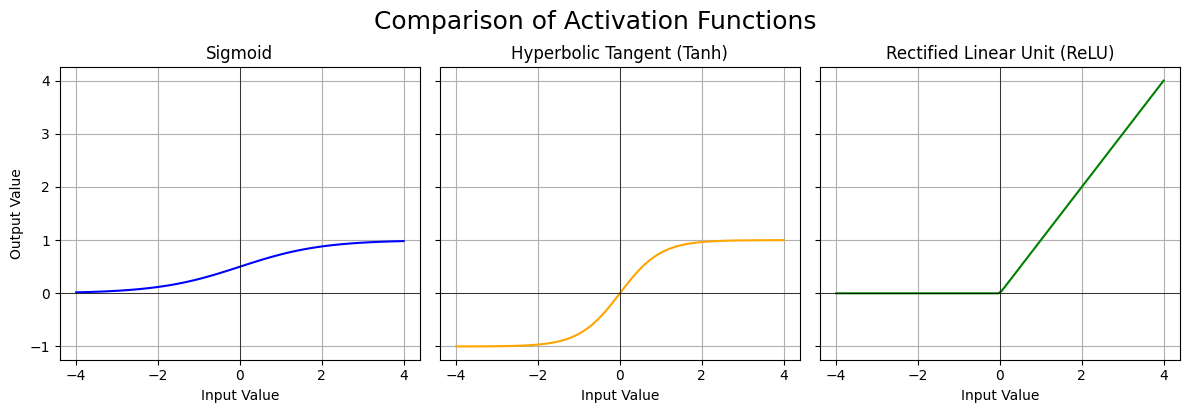

In [ ]:
# @title Popular Activation Function Graphs (1-3)
import numpy as np
import matplotlib.pyplot as plt

# Define Activation Functions (same as before)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

# Activation functions and their FULL names for iteration
activation_functions = [
    ('Sigmoid', sigmoid, 'Sigmoid'), # (Short name, function, Full Name)
    ('Tanh', tanh, 'Hyperbolic Tangent (Tanh)'),
    ('ReLU', relu, 'Rectified Linear Unit (ReLU)'),
]

# Fixed x range for all plots (like in the image)
x = np.linspace(-4, 4, 100) # Wider x range as in the example image

# Create grid layout
nrows = 1
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4), sharex='all', sharey='all')
axes = axes.flatten()

# Plot each activation function in a subplot
for i, (short_name, func, full_name) in enumerate(activation_functions): # Unpack short_name, func, full_name
    y = func(x)
    ax = axes[i] # Select the i-th subplot
    ax.plot(x, y, label=short_name, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'][i]) # Use short name for label (though legend is removed)
    ax.set_title(f'{full_name}') # Use FULL name in title
    ax.set_xlabel('Input Value') # Label x-axis
    if i % ncols == 0: # Only label y-axis for the first column plots for cleanliness
        ax.set_ylabel('Output Value')
    ax.grid(True)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.legend().remove() # Remove legend inside plot for cleaner look, names are in titles

# Remove any unused subplots (there shouldn't be any in this case, but good practice)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.97]) # Adjust layout, leave space for suptitle
# plt.suptitle('Comparison of Activation Functions', fontsize=18) # Overall title
plt.suptitle('Comparison of Activation Functions', fontsize=18, y=1.02)

plt.show()


### Popular Activation Functions


#### 1. Sigmoid
- **Description**:  
  This function squashes any input into a value between 0 and 1.  
  It’s like a dimmer switch for lights, smoothly adjusting the brightness from completely off (0) to fully on (1), with varying levels in between.
- **Formula**:  
  $$
  \sigma(x) = \frac{1}{1 + e^{-x}}
  $$


#### 2. Hyperbolic Tangent (Tanh)
- **Description**:  
  Imagine a direction switch that can smoothly control movement between two opposite directions, say, "forward" and "backward."  
  Input values determine the switch's position. It's a smooth way to represent direction or polarity.
- **Formula**:  
  $$
  \tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
  $$

#### 3. Rectified Linear Unit (ReLU)
- **Description**:  
  This function outputs the input directly if it’s positive, and 0 if it’s negative.  
  Imagine it as a gate that only opens for positive signals, letting them pass through unchanged, while completely blocking any negative signals.
- **Formula**:  
  $$
  \text{ReLU}(x) = \max(0, x)
  $$



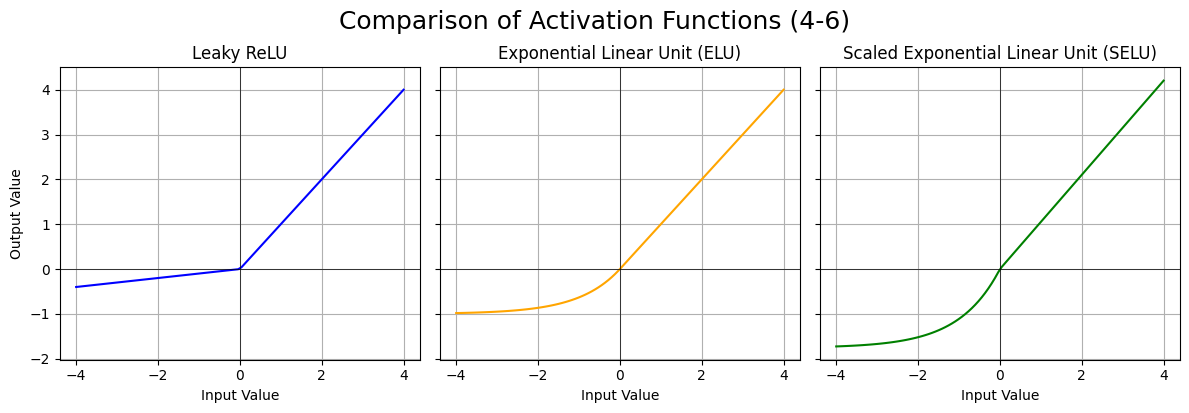

In [ ]:
# @title Activation Function Graphs (4-6)
import numpy as np
import matplotlib.pyplot as plt

# Define Activation Functions (same as before)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def leaky_relu(x, alpha=0.1):
    return np.where(x > 0, x, alpha * x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def selu(x, alpha=1.67326, scale=1.0507):
    return scale * np.where(x >= 0.0, x, alpha * (np.exp(x) - 1.0))


# Activation functions and their FULL names for iteration
activation_functions = [
    # ('Sigmoid', sigmoid, 'Sigmoid'), # (Short name, function, Full Name)
    # ('Tanh', tanh, 'Hyperbolic Tangent (Tanh)'),
    # ('ReLU', relu, 'Rectified Linear Unit (ReLU)'),
    ('Leaky ReLU', leaky_relu, 'Leaky ReLU'),
    ('ELU', elu, 'Exponential Linear Unit (ELU)'),
    ('SELU', selu, 'Scaled Exponential Linear Unit (SELU)')
]

# Fixed x range for all plots (like in the image)
x = np.linspace(-4, 4, 100) # Wider x range as in the example image


# Create subplots - fixed 1x3 grid, NO y-axis sharing now
nrows = 1
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4), sharex='all', sharey='all') # sharex='all' but NOT sharey
axes = axes.flatten() # Flatten the axes array

# Plot each activation function in a subplot
for i, (short_name, func, full_name) in enumerate(activation_functions): # Unpack short_name, func, full_name
    y = func(x)
    ax = axes[i] # Select the i-th subplot
    ax.plot(x, y, label=short_name, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'][i]) # Use short name for label (though legend is removed)
    ax.set_title(f'{full_name}') # Use FULL name in title
    ax.set_xlabel('Input Value') # Label x-axis
    if i % ncols == 0: # Only label y-axis for the first column plots for cleanliness
        ax.set_ylabel('Output Value')
    ax.grid(True)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.legend().remove() # Remove legend inside plot for cleaner look, names are in titles

# Remove any unused subplots (there shouldn't be any in this case, but good practice)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.97]) # Adjust layout, leave space for suptitle
# plt.suptitle('Comparison of Activation Functions', fontsize=18) # Overall title
plt.suptitle('Comparison of Activation Functions (4-6)', fontsize=18, y=1.02)
plt.show()


#### 4. Leaky ReLU
- **Description**:  
  Like ReLU, but it allows a tiny bit of negative input to pass through instead of completely blocking it.  
  Think of it as a gate with a tiny leak, mostly blocking negative signals, but still allowing a small trickle to get through.
- **Formula**:  
  $$
  \text{Leaky ReLU}(x) =
  \begin{cases}
    x & \text{if } x > 0 \\
    \alpha x & \text{if } x \leq 0
  \end{cases}
  $$  
  $$
  \text{Where}: \alpha \approx 0.01-0.10
  $$

#### 5. Exponential Linear Unit (ELU)
- **Description**:  
  Similar to ReLU but handles negative inputs more smoothly.  
  Picture it as a smooth ramp for positive inputs, and for negative inputs, it gently curves towards a specific negative value instead of abruptly stopping at zero. This smooth transition can help with learning.
- **Formula**:  
  $$
  \text{ELU}(x) =
  \begin{cases}
    x & \text{if } x \geq 0 \\
    \alpha (e^{x} - 1) & \text{if } x < 0
  \end{cases}
  $$  
  $$
  \text{Where}: \alpha \approx 1.0
  $$

#### 6. Scaled Exponential Linear Unit (SELU)
- **Description**:  
  Think of SELU as automatic volume control in an audio system.  
  It not only activates the signal but also automatically adjusts its strength to keep it within a consistent and stable range. This built-in regulation helps maintain well-behaved data flow.
- **Formula**:  
  $$
  \text{SELU}(x) = \text{scale} \cdot
  \begin{cases}
    x & \text{if } x \geq 0 \\
    \alpha (e^{x} - 1) & \text{if } x < 0
  \end{cases}
  $$  
  $$
  \text{Where}: \alpha \approx 1.67326 \text{,   scale} \approx 1.0507
  $$
---

## 5. Building a Simple Neural Network

Check out https://playground.tensorflow.org/ for a great interactive visual of what a neural network looks like and how it operates.


## 6. How Data Moves Through the Network (The Forward Pass)

The term **forward pass** refers to the process of moving the input data through the network to get an output. Here’s a simple way to think about it:

1. **Input Stage:** Your data (like a photo, text, or numbers) is fed into the network.
2. **Processing Stage:** Each neuron in the network processes its inputs by doing a weighted sum, adding a bias, and then applying an activation function.
3. **Output Stage:** The result from the final layer gives you the network's prediction or decision.


## 7. Key Terms and Nomenclature

Here’s a quick glossary of the terms we’ve used:

- **Neuron:** A basic unit in a neural network that performs a simple calculation.
- **Weights (W):** Numbers that determine how much influence each input has. They’re like adjustable multipliers.
- **Bias (b):** A number added to the weighted inputs to help shift the output.
- **Activation Function:** A function that transforms the weighted sum into a useful output. Examples include sigmoid, tanh, and ReLU.
- **Layer:** A group of neurons working together. Neural networks typically have an input layer, one or more hidden layers, and an output layer.
- **Forward Pass:** The process of moving data through the network to produce an output.

## 8. Summary and Next Steps

In this notebook, we have:

- Introduced the basic idea behind neural networks using simple language and analogies.
- Broken down what a neuron does and explained its math in a step-by-step fashion.
- Looked at common activation functions and visualized their behavior with graphs.
- Built a simple neural network from scratch with clear code examples and explanations of each step.

This is just the beginning! Next, we’ll explore how these networks learn from data by adjusting their weights—a process known as backpropagation.

### Additional Resources
- [Tensorflow Playground](https://playground.tensorflow.org/)
- [3Blue1Brown’s Neural Networks Series](https://www.youtube.com/watch?v=aircAruvnKk)


---

**License:** MIT License (see detailed license information in the next cell)

<details>
<summary>License Information</summary>

MIT License

Copyright (c) 2024

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
</details>